In [1]:
import pandas as pd
%load_ext autoreload
%autoreload 2

In [6]:
data_path = "Data_raw_01082024/withWaterArea.csv"
data = pd.read_csv(data_path)
data

,date,Optical_Depth_055,precipitation_mean,Wind speed,SoilMoi0_10cm_inst,SoilTMP0_10cm_inst,area_Water
0,23-Sep-17,0.873,0.436,2.370,0.106,24.737,1312.681699
1,23-Oct-17,0.159,1.192,2.517,0.147,19.550,1213.495450
2,23-Nov-17,0.165,0.468,2.130,0.183,2.652,1292.438837
3,23-Dec-17,0.106,0.850,2.475,0.187,2.483,1321.907720
4,23-Jan-18,0.156,3.137,2.088,0.225,2.159,1509.406868
5,23-Feb-18,0.334,1.218,2.805,0.228,9.957,2279.575850
6,23-Mar-18,0.400,2.114,3.158,0.220,8.174,2382.052765
7,23-Apr-18,0.310,3.352,2.421,0.253,14.413,2417.301598
8,23-May-18,0.444,0.721,2.521,0.206,40.210,2563.500395
9,23-Jun-18,0.767,0.012,2.899,0.130,46.483,2301.795844


In [15]:
import DataLoader, Machine_Model, Engine, Information
import torch

train_percent = 0.7
val_percent = 0.15
batch_size = 300

dataloader = DataLoader.MyDataloader(file_path=data_path, train_percent=train_percent, val_percent=val_percent,
                                     batch_size=batch_size)
train, val, test = dataloader.fit()
try:
    if len(train) == 0 or len(val) == 0 or len(test) == 0:
        raise ValueError("Data with zero item. Not working. Change the sequence or the batch size.")
except:
    raise ValueError("Data with zero item. Not working. Change the sequence or the batch size.")
    
# INPUT_SIZE = len(train.dataset[0][0][0])  # number of features
INPUT_SIZE = len(Information.features)
HIDDEN_UNITS = 8
OUTPUT_SIZE = 1

model0 = Machine_Model.RNN_V0(input_size=INPUT_SIZE, hidden_size=HIDDEN_UNITS, output_size=OUTPUT_SIZE)

EPOCHS = 100
loss_fn = torch.nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model0.parameters(), learning_rate, weight_decay=0.00001)

engine = Engine.Machine_Engine(model=model0, train_dataloader=train, val_dataloader=val, test_dataloader=test)
model0_results = engine.train(loss_fn=loss_fn, optimizer=optimizer, epochs_num=EPOCHS, early_stop_patience=None,
                              writer=False, resolution=500)


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1 | train: Loss 0.170312 Accuracy -1.0663 | validation: Loss 0.180447 Accuracy -1.3967
Epoch 2 | train: Loss 0.170312 Accuracy -1.0663 | validation: Loss 0.180447 Accuracy -1.3967
Epoch 3 | train: Loss 0.170312 Accuracy -1.0663 | validation: Loss 0.180447 Accuracy -1.3967
Epoch 4 | train: Loss 0.170312 Accuracy -1.0663 | validation: Loss 0.180447 Accuracy -1.3967
Epoch 5 | train: Loss 0.170312 Accuracy -1.0663 | validation: Loss 0.180447 Accuracy -1.3967
Epoch 6 | train: Loss 0.170312 Accuracy -1.0663 | validation: Loss 0.180447 Accuracy -1.3967
Epoch 7 | train: Loss 0.170312 Accuracy -1.0663 | validation: Loss 0.180447 Accuracy -1.3967
Epoch 8 | train: Loss 0.170312 Accuracy -1.0663 | validation: Loss 0.180447 Accuracy -1.3967
Epoch 9 | train: Loss 0.170312 Accuracy -1.0663 | validation: Loss 0.180447 Accuracy -1.3967
Epoch 10 | train: Loss 0.170312 Accuracy -1.0663 | validation: Loss 0.180447 Accuracy -1.3967
Epoch 11 | train: Loss 0.170312 Accuracy -1.0663 | validation: Loss 0

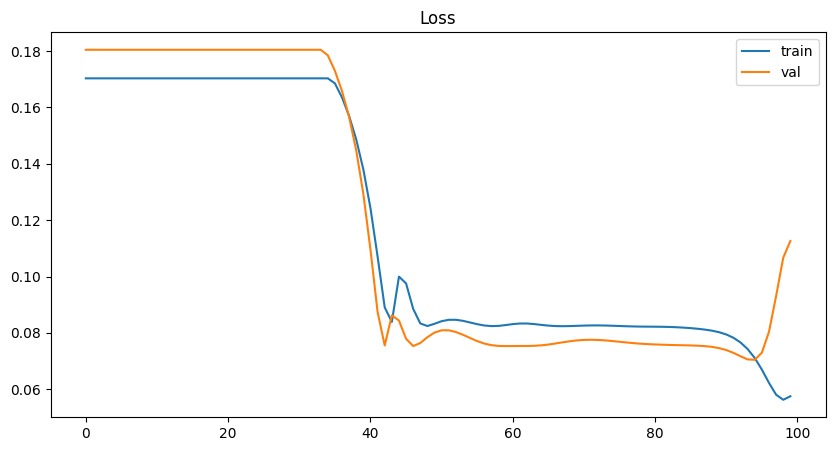

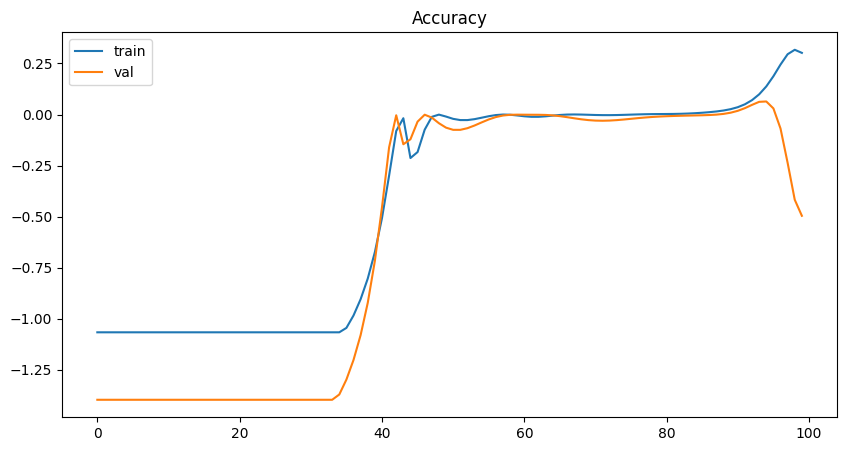

In [16]:
engine.plot_loss()
engine.plot_acc()

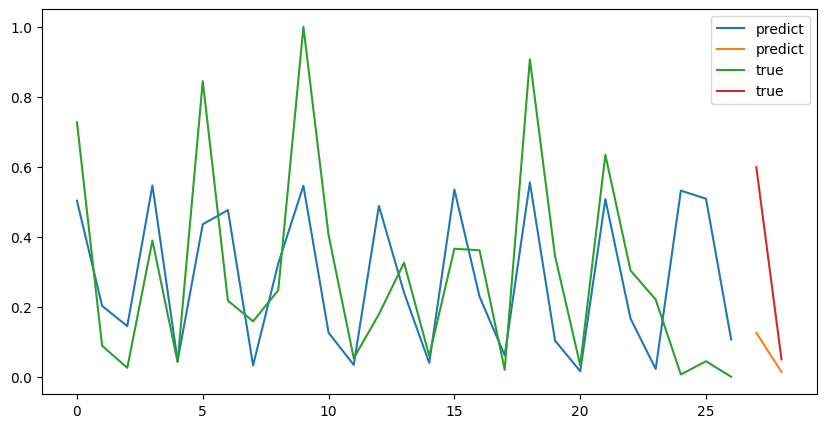

In [17]:
engine.plot_predict_real()

In [23]:
test_loss, test_acc, true_predict_list = engine.test(loss_fn=loss_fn)
test_acc

[!!!IMPORTANT NOTE!!!]
The test_function provided here is intended solely for the final model analysis and reporting purposes.
Please refrain from using it as a general-purpose function in your own projects. Always refer to
the appropriate train and validation data for developing and fine-tuning your own models.


0.7542276978492737

In [ ]:
engine.save()

In [104]:
%load_ext tensorboard
%tensorboard --logdir=runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
